# 47 Delaunay Triangulation of Shapely Multipoints

Similar to the Delaunay triangulation for GeoDataFrames to return a PolyData dataset, the triangulation can also be performed on Shapely MultiPoints. 

<img src="../images/tutorial47_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/47_delaunay_triangulation_of_shapely_multipoints/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Create Shapely Multipoint

A multipoint object is created from two NumPy arrays consisting of random coordinate pairs to demonstrate the delaunay triangulation of Shapely.

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


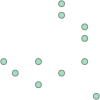

In [2]:
import gemgis as gg
from shapely.geometry import MultiPoint
import numpy as np

x = np.random.randint(0,10,11)
y = np.random.randint(0,10,11)

points = np.array([x,y])

multipoints = MultiPoint(points.T)
multipoints

## Performing the Triangulation

The function ``triangulate(..)`` of the shapely.ops module is used to perform the triangulation. The result is a list of polygons consisting of three vertices. 

In [3]:
from shapely.ops import triangulate

triangles = triangulate(multipoints)
triangles

## Creating GeoDataFrames

A GeoDataFrame is created from the Polygons and MultiPoints for plotting. 

In [4]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=triangles)
gdf

,geometry
0,"POLYGON ((1.00000 4.00000, 2.00000 3.00000, 4...."
1,"POLYGON ((1.00000 4.00000, 4.00000 4.00000, 6...."
2,"POLYGON ((1.00000 4.00000, 6.00000 8.00000, 6...."
3,"POLYGON ((6.00000 9.00000, 6.00000 8.00000, 8...."
4,"POLYGON ((8.00000 7.00000, 6.00000 8.00000, 8...."
5,"POLYGON ((8.00000 7.00000, 8.00000 6.00000, 9...."
6,"POLYGON ((9.00000 1.00000, 8.00000 6.00000, 8...."
7,"POLYGON ((9.00000 1.00000, 8.00000 4.00000, 6...."
8,"POLYGON ((9.00000 1.00000, 6.00000 3.00000, 4...."
9,"POLYGON ((4.00000 2.00000, 6.00000 3.00000, 4...."


In [5]:
gdf_points = gpd.GeoDataFrame(geometry=[multipoints])
gdf_points

,geometry
0,"MULTIPOINT (2.00000 3.00000, 8.00000 7.00000, ..."


## Plotting the Results

The result of the triangulation can be plotted. 

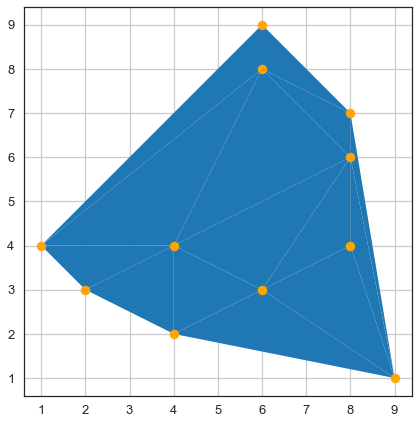

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)

gdf.plot(ax=ax, aspect='equal')
gdf_points.plot(ax=ax, aspect='equal', color='orange')
plt.grid()